In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from librosa import cqt

os.chdir('..')  # ONLY EXECUTE ONCE PER SESSION!
from music_transcription.onset_detection.read_data import read_X

In [2]:
sr = 44100

In [3]:
def get_samples(wavpath):
    fr_hz = 100
    subs = 1

    samples, _ = read_X(wavpath, fr_hz, sr, subs)
    return samples.ravel()


def plot_cqt(samples):
    hopl = 512 # must be 2^n cannot be 441 (= subs)
    n_bins=60
    lowfreq = 55.0 # A1 (midi 33) # gtr E 82.4068892282

    cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=lowfreq, n_bins=n_bins*3, bins_per_octave=36, scale=False)
    cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

    plt.figure(figsize=(24,18))
    plt.imshow(cqt_spect, aspect=8, origin='lower', cmap=plt.cm.spectral)
    plt.title('3 bins per note, aspect=8')
    yt = np.arange(0, cqt_spect.shape[0], 3)
    _ = plt.yticks(yt, (yt/3+33).astype('int')) # range starts at midi pitch 33

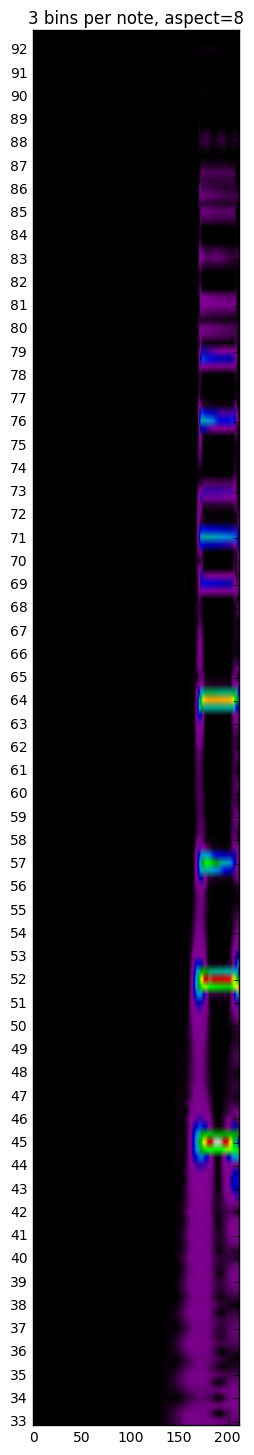

In [4]:
# pitches 45 / 52
samples = get_samples(r'data\IDMT-SMT-GUITAR_V2\dataset2\audio\AR_Lick7_FN.wav')
plot_cqt(samples[:int(2.4541*sr)])

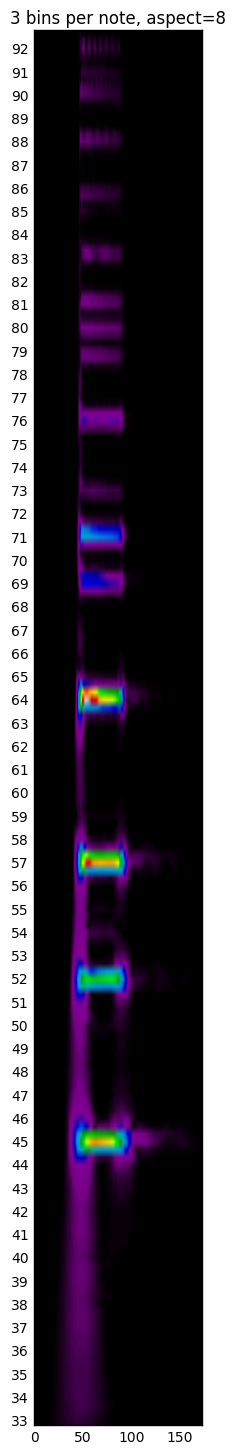

In [5]:
# pitches 45 / 52
samples = get_samples(r'data\generated\all\audio\generated_poly_2.wav')
plot_cqt(samples[int(172*sr):int(174*sr)])

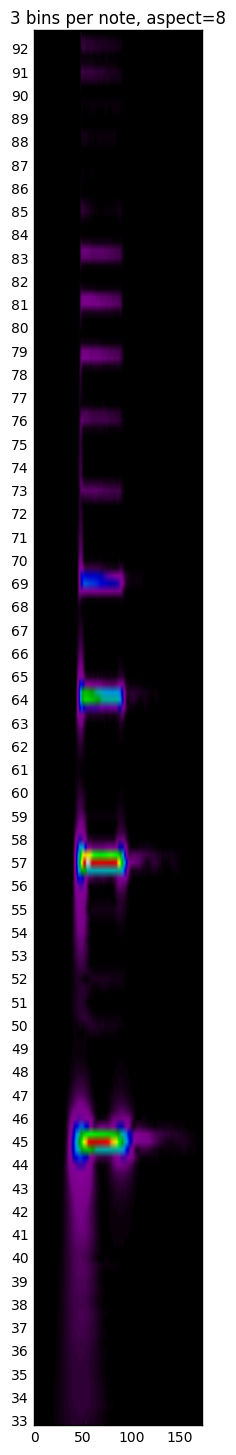

In [6]:
# pitch 45
samples = get_samples(r'data\generated\all\audio\generated_mono.wav')
plot_cqt(samples[int(10*sr):int(12*sr)])

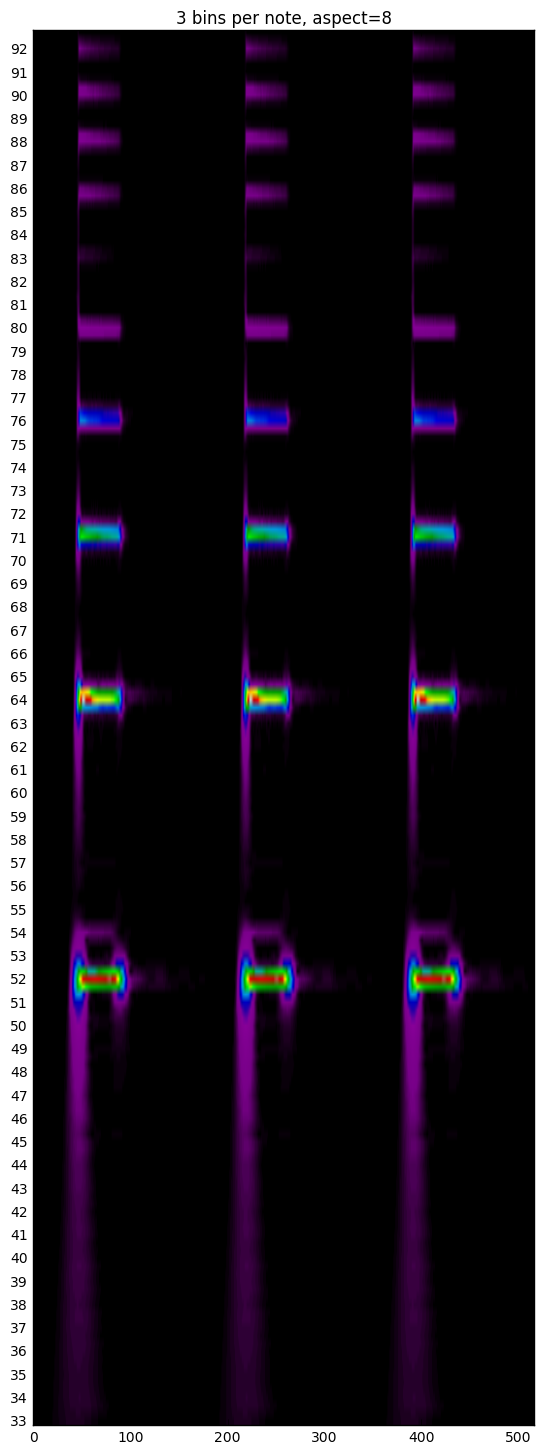

In [7]:
# pitch 52
samples = get_samples(r'data\generated\all\audio\generated_mono.wav')
plot_cqt(samples[int(42*sr):int(48*sr)])

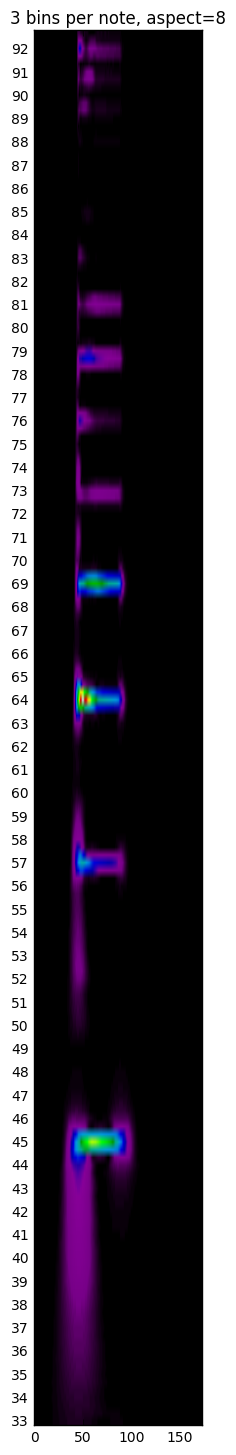

In [8]:
# pitch 45
samples = get_samples(r'tmp\generated_mono_default_sf.wav')
plot_cqt(samples[int(10*sr):int(12*sr)])

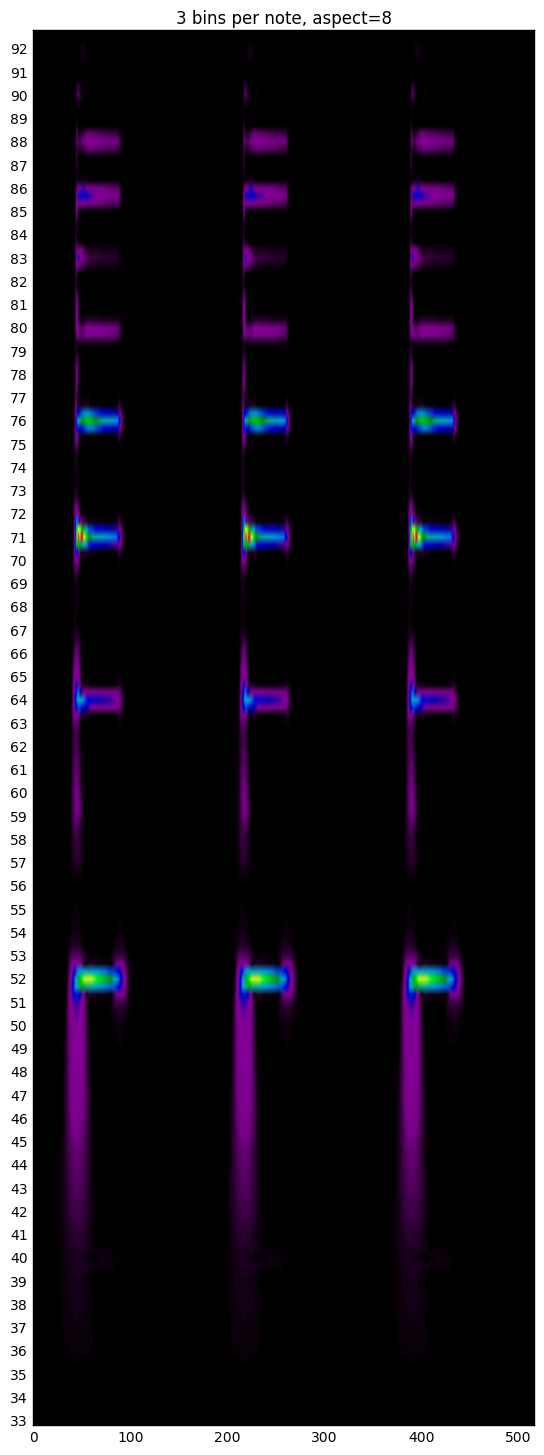

In [9]:
# pitch 52
samples = get_samples(r'tmp\generated_mono_default_sf.wav')
plot_cqt(samples[int(42*sr):int(48*sr)])

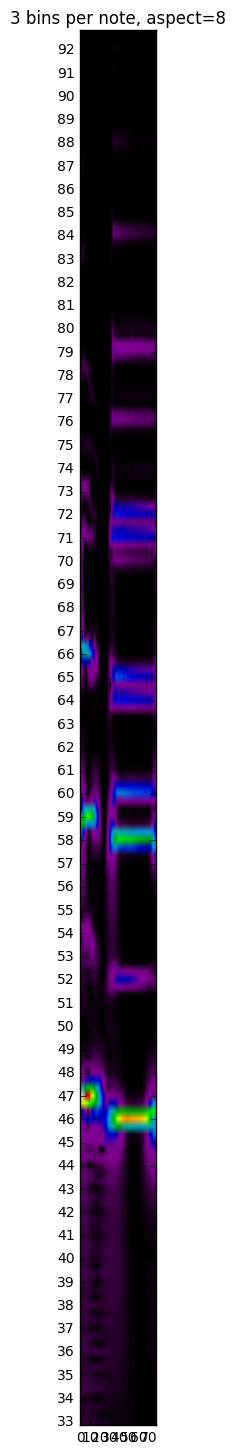

In [10]:
# pitches 47 / 52 / 60
samples = get_samples(r'data\IDMT-SMT-GUITAR_V2\dataset3\audio\nocturneNr2.wav')
plot_cqt(samples[int(1.8*sr):int(2.7*sr)])

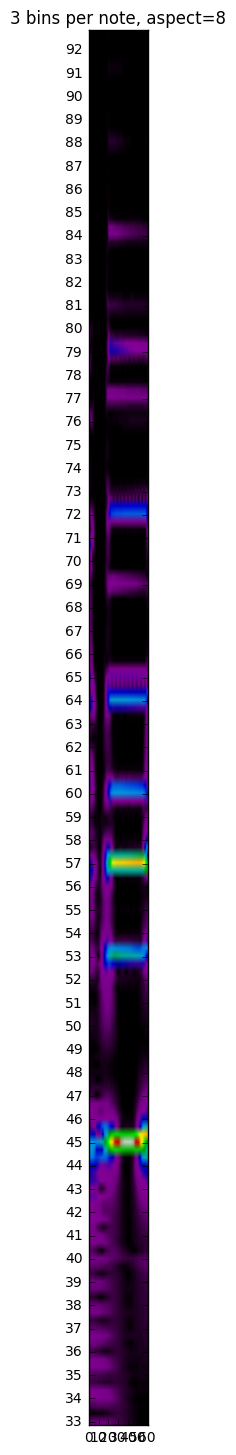

In [11]:
# pitches 45 / 53 / 60
samples = get_samples(r'data\IDMT-SMT-GUITAR_V2\dataset3\audio\nocturneNr2.wav')
plot_cqt(samples[int(2.7*sr):int(3.4*sr)])

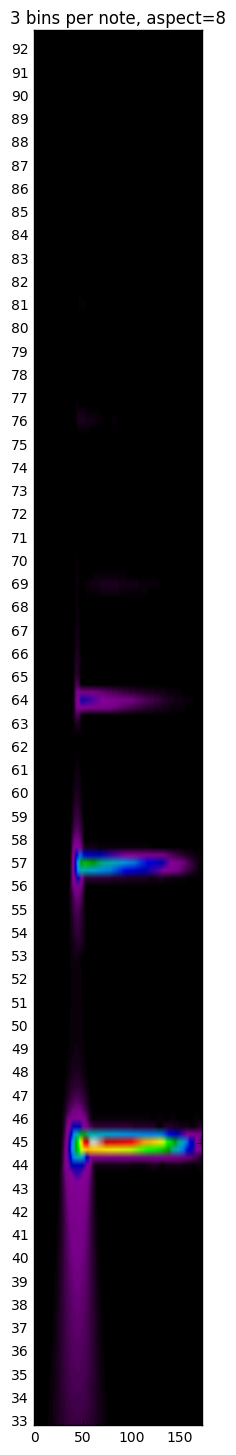

In [12]:
# pitch 45
samples = get_samples(r'data\IDMT-SMT-AUDIO-EFFECTS\Gitarre monophon\Samples\NoFX\G61-45105-1111-20598.wav')
plot_cqt(samples)

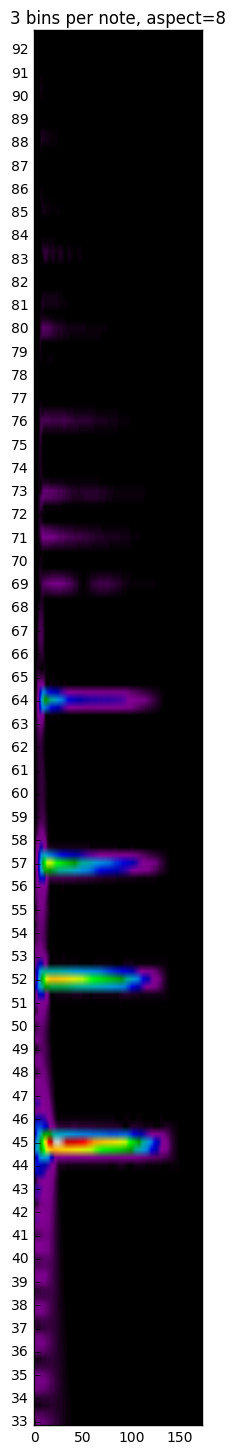

In [13]:
# Pitches 45 / 52
samples = get_samples(r'data\IDMT-SMT-AUDIO-EFFECTS\Gitarre polyphon\Samples\NoFX\P64-45140-1111-41232.wav')
plot_cqt(samples)

**Check Audio Effects polyphonic**

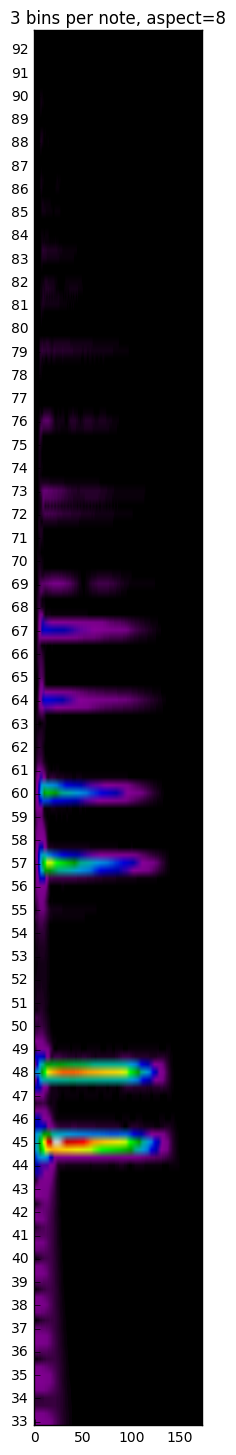

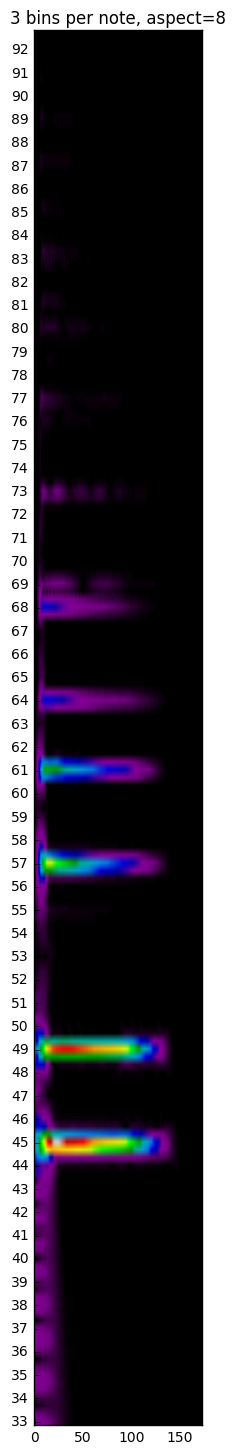

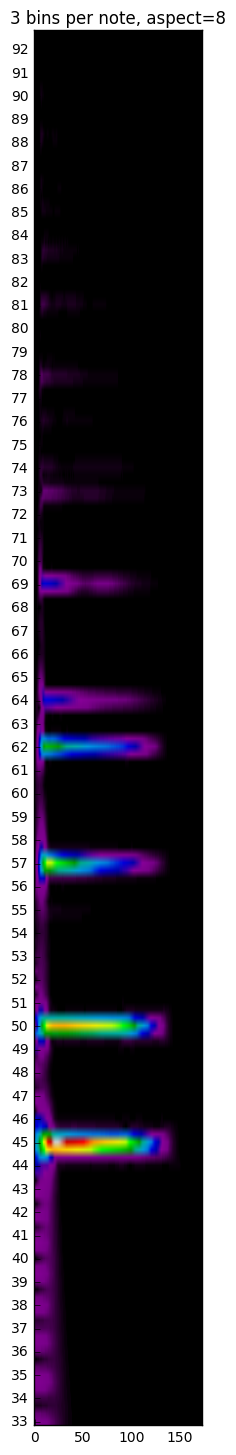

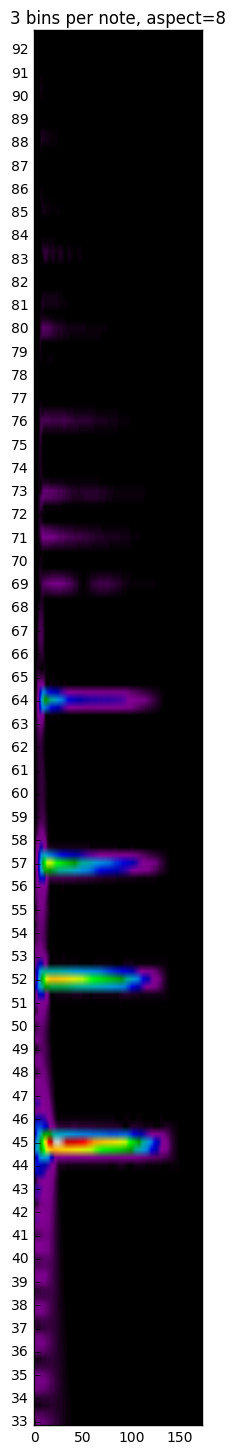

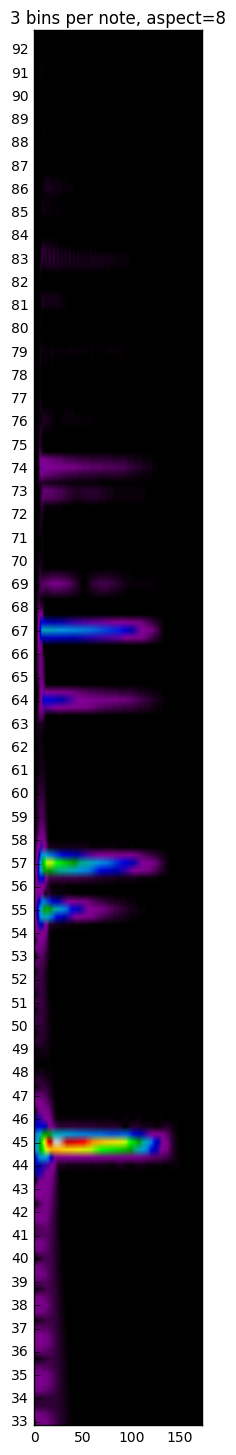

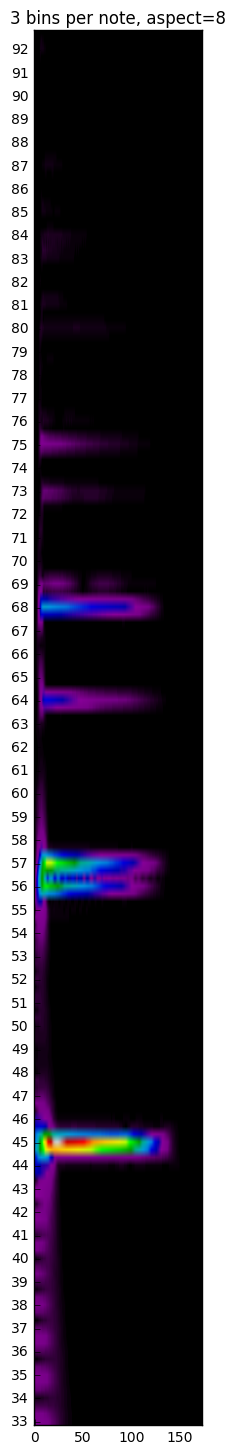

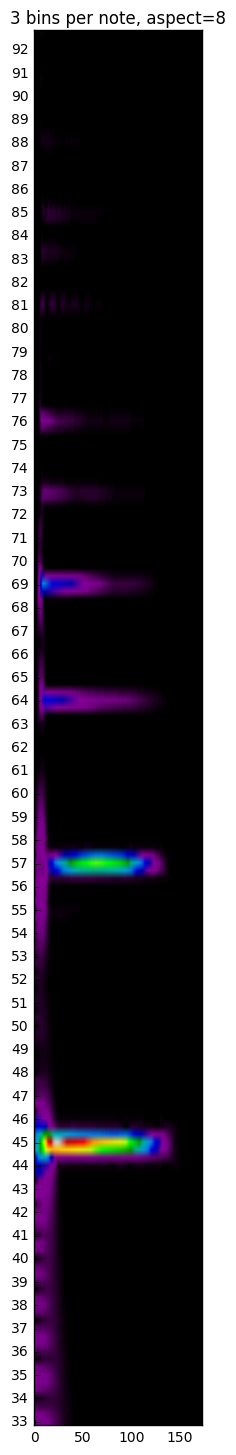

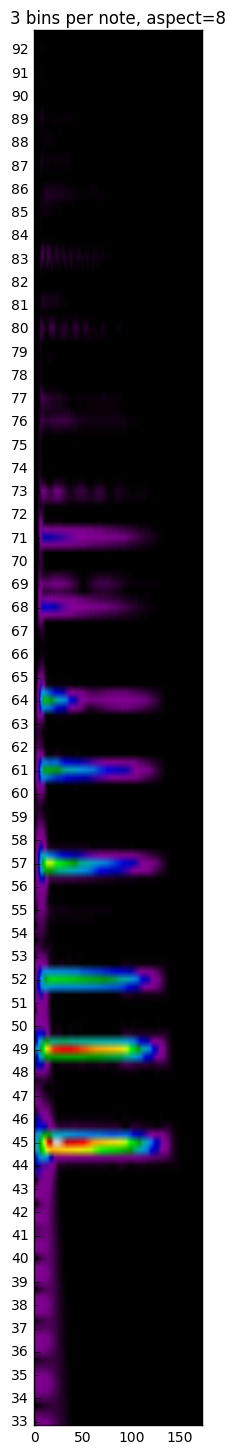

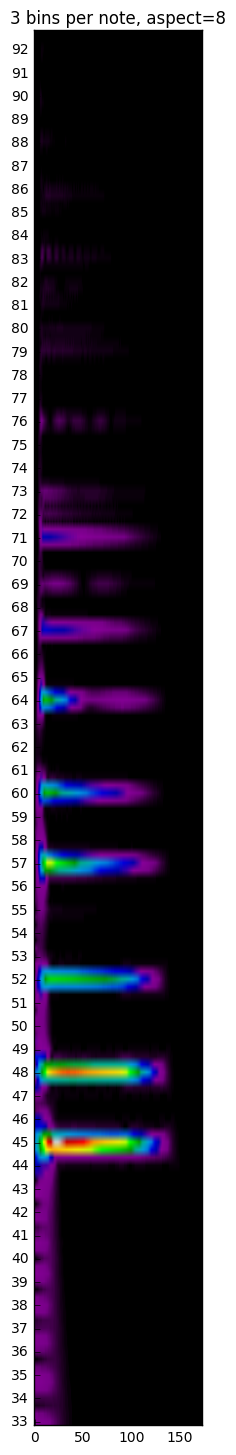

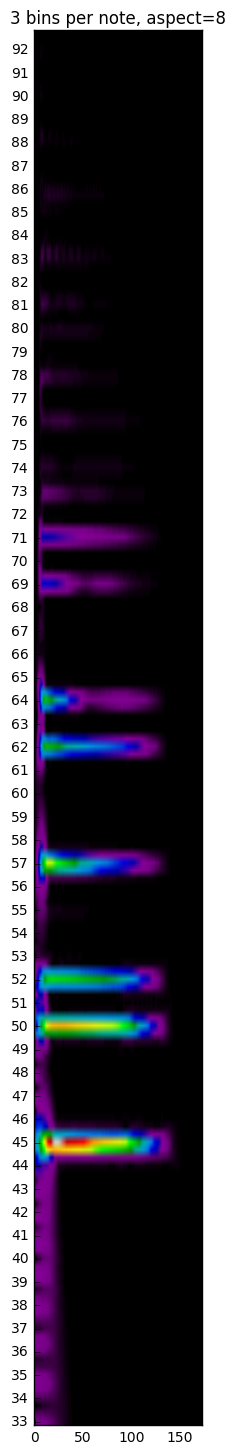

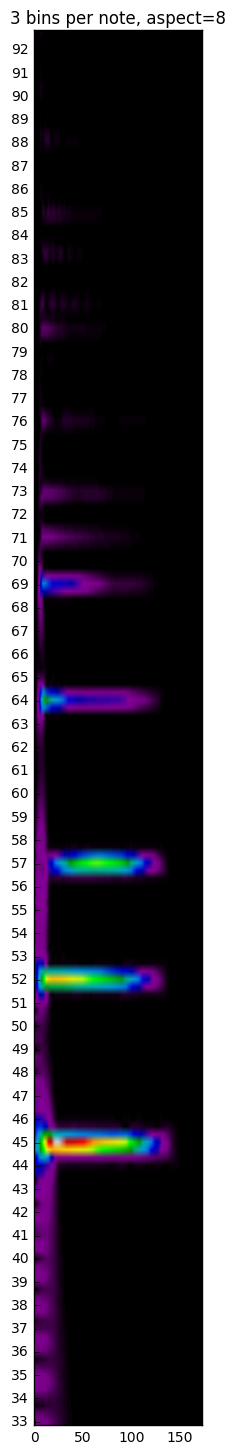

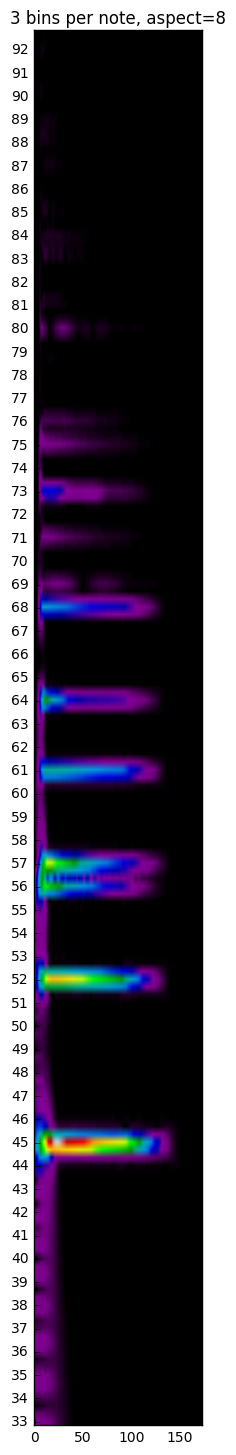

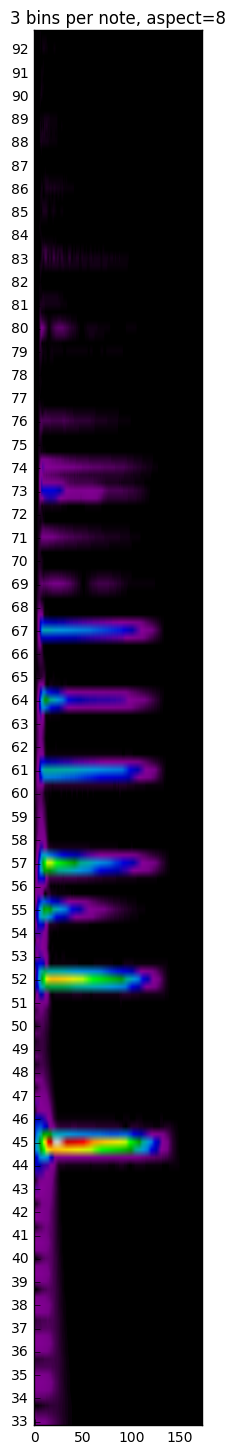

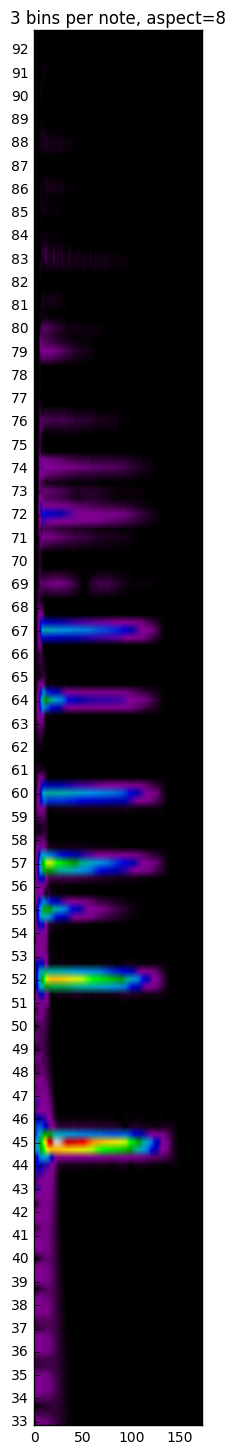

In [16]:
import os

files = [
    'P64-45110-1111-41187.wav',
    'P64-45120-1111-41202.wav',
    'P64-45130-1111-41217.wav',
    'P64-45140-1111-41232.wav',
    'P64-45150-1111-41247.wav',
    'P64-45160-1111-41262.wav',
    'P64-45170-1111-41277.wav',
    'P65-45210-1111-41292.wav',
    'P65-45220-1111-41307.wav',
    'P65-45230-1111-41322.wav',
    'P65-45240-1111-41337.wav',
    'P65-45250-1111-41352.wav',
    'P65-45260-1111-41367.wav',
    'P65-45270-1111-41382.wav',
]
for file in files:
    samples = get_samples(os.path.join(r'data\IDMT-SMT-AUDIO-EFFECTS\Gitarre polyphon\Samples\NoFX', file))
    plot_cqt(samples)

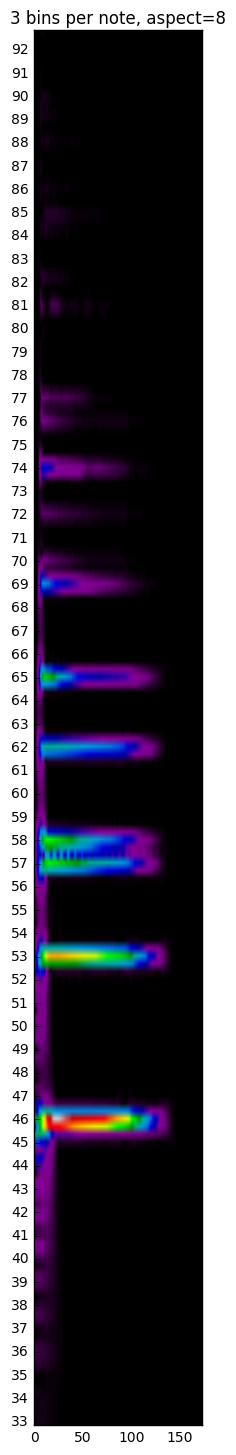

In [17]:
files = [
    'P65-46250-1111-41353.wav',
]
for file in files:
    samples = get_samples(os.path.join(r'data\IDMT-SMT-AUDIO-EFFECTS\Gitarre polyphon\Samples\NoFX', file))
    plot_cqt(samples)